<h1 style="text-align: center">Happiness Prediction</h1>

In [23]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

pd.reset_option("display.max_columns")
pd.reset_option("display.max_rows")

## Data R&D

In [24]:
df_main = pd.read_csv('Somerville_happiness_v2.csv', sep=',', header=0)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Life satisfaction              1049 non-null   int64  
 1   Neighborhood satisfaction      1049 non-null   int64  
 2   Housing satisfaction           1049 non-null   int64  
 3   Community events availability  1049 non-null   int64  
 4   Sense of security              1049 non-null   int64  
 5   Annual household income        1049 non-null   float64
 6   Gender                         1049 non-null   object 
 7   Age                            1049 non-null   object 
 8   Living with children under 18  1049 non-null   int64  
 9   Is disabled                    1049 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 82.1+ KB


In [25]:
N = 1000
df_trimed = df_main.head(N)

# All database columns
life_satisfaction = df_trimed['Life satisfaction'].to_numpy()
neighborhood_satisfaction = df_trimed['Neighborhood satisfaction'].to_numpy()
housing_satisfaction = df_trimed['Housing satisfaction'].to_numpy()
community_events_availability = df_trimed['Community events availability'].to_numpy()
sense_of_security = df_trimed['Sense of security'].to_numpy()
annual_household_income = df_trimed['Annual household income'].to_numpy()
gender = df_trimed['Gender'].to_numpy()
age = df_trimed['Age'].to_numpy()
living_with_children = df_trimed['Living with children under 18'].to_numpy()
is_disabled = df_trimed['Is disabled'].to_numpy()

# Normalization
annual_household_income = (annual_household_income/annual_household_income.std(axis=0))
annual_household_income = annual_household_income-annual_household_income.mean(axis=0)

## Prior predictive checks

In [26]:
# prior_predictive_dist = CmdStanModel(stan_file='model1_ppc.stan')

# # Compilation of code_1.stan and get 1000 samples
# samples = prior_predictive_dist.sample(fixed_param=True, 
#                                        iter_sampling=1000)

# # Creation of pandas dataframe from resulting draws
# df = samples.draws_pd()
# display(df)

# # Compute ratio of allergic reactions for each sample
# ratio = df['y'] / df['N']

# predictors = df[['Annual household income', 'Housing satisfaction']].head(100).to_numpy()
# print(df['Housing satisfaction'].unique())
# print(predictors)
# predictors = predictors/predictors.max(axis=0)
# # predictors = predictors-predictors.mean(axis=0)
# target = df['Life satisfaction'].head(100).to_numpy().astype('int')
# print(target)
# print(predictors)
# xd = CmdStanModel(stan_file='test.stan')

# d = {'K' : 10,
#      'N' : 100,
#      'J' : 2,
#      'y' : target,
#      'X' : predictors}

# # Compilation of code_1.stan and get 1000 samples
# samples = xd.sample(data=d, fixed_param=True, iter_sampling=1000, iter_warmup=1000, chains=1)
# print(samples.diagnose())

# # Creation of pandas dataframe from resulting draws
# df_old = samples.draws_pd()
# display(df_old)

## Model fit and evaluation

In [27]:
xd = CmdStanModel(stan_file='test2.stan')

d = {'N' : N,
     'K' : 10,
     'y' : life_satisfaction,
     'neigh_sat' : neighborhood_satisfaction,
     'hous_sat' : housing_satisfaction,
     'com_even_avail' : community_events_availability,
     'sen_of_sec' : sense_of_security,
     'ann_hous_inc' : annual_household_income,
     'liv_with_child' : living_with_children,
     'is_disabled' : is_disabled}

# Compilation of test2.stan and get 1000 samples
samples = xd.sample(data=d, iter_sampling=25, iter_warmup=100, chains=4)
print(samples.diagnose())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |███▎      | 00:00 Status

chain 1 |██████████| 00:16 Iteration: 100 / 125 [ 80%]  (Warmup)





chain 1 |          | 00:20 Iteration: 101 / 125 [ 80%]  (Sampling)


chain 1 |██████████| 00:24 Sampling completed                     
chain 2 |██████████| 00:24 Sampling completed                     
chain 3 |██████████| 00:24 Sampling completed                     
chain 4 |██████████| 00:24 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.



Processing csv files: /tmp/tmpzfeie_0l/test2-20230709055532_1.csv, /tmp/tmpzfeie_0l/test2-20230709055532_2.csv, /tmp/tmpzfeie_0l/test2-20230709055532_3.csv, /tmp/tmpzfeie_0l/test2-20230709055532_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

The following parameters had split R-hat greater than 1.05:
  happy[11], happy[15], happy[23], happy[43], happy[55], happy[72], happy[123], happy[215], happy[264], happy[292], happy[311], happy[316], happy[358], happy[404], happy[419], happy[421], happy[446], happy[447], happy[470], happy[478], happy[494], happy[518], happy[531], happy[583], happy[659], happy[682], happy[724], happy[745], happy[780], happy[781], happy[782], happy[804], happy[816], happy[822], happy[823], happy[874], happy[934], happy[947], ha

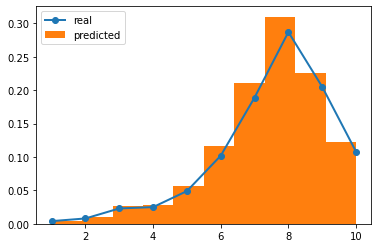

lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
0  -1840.19       0.909354    0.018048          8.0         255.0   
1  -1834.08       0.998419    0.018048          7.0         127.0   
2  -1828.84       0.758267    0.018048          7.0         255.0   
3  -1829.17       0.954350    0.018048          7.0         127.0   
4  -1829.31       0.990209    0.018048          7.0         127.0   
..      ...            ...         ...          ...           ...   
95 -1832.51       0.986198    0.017923          8.0         255.0   
96 -1833.07       0.959465    0.017923          7.0         255.0   
97 -1838.38       0.886439    0.017923          8.0         255.0   
98 -1839.73       0.879431    0.017923          8.0         255.0   
99 -1839.06       0.910272    0.017923          8.0         255.0   

    divergent__  energy__     c[1]     c[2]     c[3]     c[4]      c[5]  \
0           0.0   1869.47 -3.76255 -3.18017 -2.07268 -1.47111 -0.863704   
1           0.0   1874.42 -4.25607 -3.28156 -2.26548 -1.69800 -1.063740   
2           0.0   1857.15 -5.84085 -3.94751 -2.88239 -2.37527 -1.554950   
3           0.0   1857.95 -5.40306 -3.88613 -2.49779 -1.82230 -1.179470   
4           0.0   1852.23 -4.94330 -3.94749 -2.60673 -1.95760 -1.120410   
..          ...       ...      ...      ...      ...      ...       ...   
95          0.0   1854.15 -4.42045 -3.06197 -2.34166 -1.81750 -1.105020   
96          0.0   1855.31 -5.79362 -4.55919 -3.16511 -2.42638 -1.745580   
97          0.0   1860.74 -3.58445 -2.80955 -2.14779 -1.55140 -0.945721   
98          0.0   1873.55 -5.56259 -4.23923 -2.81629 -2.20330 -1.535240   
99          0.0   1866.25 -6.65832 -4.94584 -3.30760 -2.56440 -1.872880   

        c[6]      c[7]     c[8]     c[9]  coef_neigh_sat[1]  \
0   0.103225  1.046380  2.64218  4.31942          -0.556130   
1  -0.072495  1.020490  2.46334  3.92625          -0.994294   
2  -0.733259  0.378382  1.73477  3.36143          -0.451303   
3  -0.333485  0.826827  2.27910  3.67015          -0.719963   
4  -0.250841  0.936581  2.27835  3.60182          -0.267818   
..       ...       ...      ...      ...                ...   
95 -0.108568  0.904986  2.27736  3.86215          -0.699300   
96 -0.926067  0.284622  1.65927  3.23239          -0.969605   
97 -0.017594  1.202400  2.64374  4.16686           0.472667   
98 -0.648363  0.754831  2.09589  3.56950          -0.070488   
99 -0.899255 -0.039162  1.43697  3.21714          -0.393104   

    coef_neigh_sat[2]  coef_neigh_sat[3]  coef_neigh_sat[4]  \
0           -0.522263          -0.260308          -0.144676   
1           -0.740137          -0.417891          -0.321452   
2           -0.418927          -0.371433          -0.239572   
3           -0.689556          -0.643584          -0.536762   
4           -0.235310          -0.093322          -0.043786   
..                ...                ...                ...   
95          -0.559251          -0.485933          -0.253477   
96          -0.858350          -0.344353          -0.290426   
97           0.532650           0.572230           0.707627   
98          -0.056542           0.241734           0.264422   
99          -0.363686          -0.287028           0.172436   

    coef_neigh_sat[5]  coef_neigh_sat[6]  coef_neigh_sat[7]  \
0           -0.142577          -0.066864          -0.020337   
1           -0.308773          -0.139079          -0.083435   
2           -0.040212          -0.008008           0.109250   
3           -0.447350          -0.398829          -0.270131   
4            0.230167           0.247092           0.339173   
..                ...                ...                ...   
95          -0.195276          -0.152407           0.094384   
96          -0.127459           0.055283           0.114234   
97           0.735285           0.772126           0.996623   
98           0.379384           0.506569           0.541141   
99           0.207468           0.375849           0.470694   

    co

In [39]:
model1_happy = samples.stan_variable('happy').flatten()

plt.figure()
x, y = np.unique(life_satisfaction, return_counts=True)
plt.plot(x, y/sum(y), marker='o', linewidth=2, label='real')
plt.hist(model1_happy, align='mid', density=True, label='predicted')
plt.legend()
plt.show()

pd.set_option('display.max_columns', None) 
# pd.set_option("display.max_rows", None)

df_res = samples.draws_pd()
display(df_res)